In [ ]:
import pandas as pd
import numpy as np
import sklearn
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv('housing.csv', delim_whitespace=True, header=None, names=names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.isnull().values.sum()

0

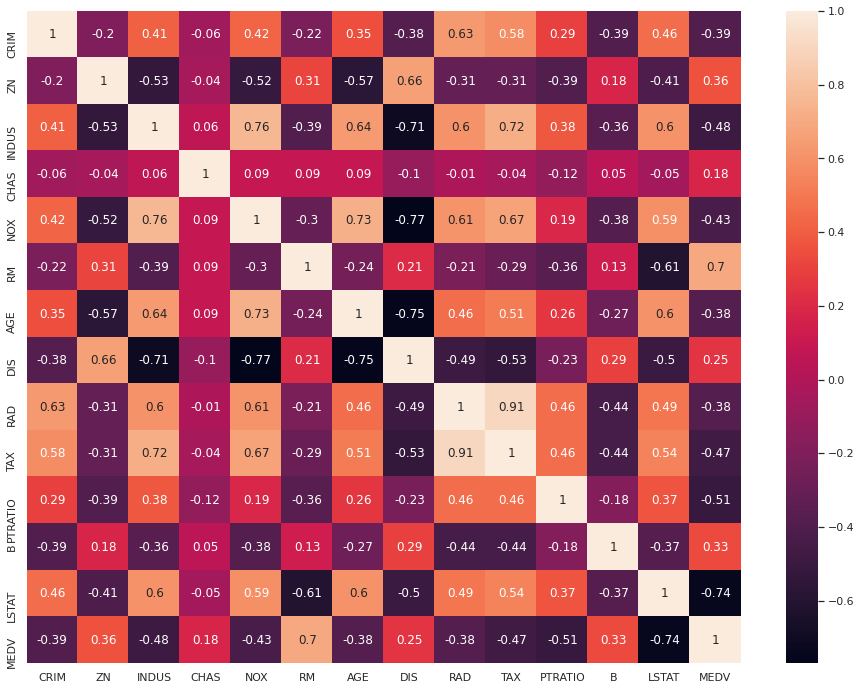

In [ ]:
corr_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(16,12)})
sns.heatmap(corr_matrix, annot=True)

In [ ]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_X = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [ ]:
X_train

array([[-0.41694218,  0.34451337, -1.11796605, ..., -1.60174615,
         0.3982937 , -1.10817559],
       [-0.2800016 , -0.49972297, -0.42106823, ...,  1.1755678 ,
         0.44841978,  0.86323731],
       [-0.40809056, -0.49972297, -0.36021645, ...,  1.13003807,
         0.43425138, -0.67845501],
       ...,
       [-0.41946696,  2.87722238, -1.30921451, ..., -0.64562168,
         0.3844473 , -0.91284805],
       [ 0.85728607, -0.49972297,  1.02198836, ...,  0.81132991,
        -2.632671  ,  1.4980518 ],
       [-0.39498096, -0.49972297, -0.36021645, ...,  1.13003807,
        -3.05181957, -0.2654768 ]])

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Spot-Check Algorithms
models = []
models.append((' LR ', LinearRegression()))
models.append((' LASSO ', Lasso()))
models.append((' EN ', ElasticNet()))
models.append((' KNN ', KNeighborsRegressor()))
models.append((' CART ', DecisionTreeRegressor()))
models.append((' SVR ', SVR()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    # print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 LR : 0.703988 (0.029730)
 LASSO : 0.642253 (0.040441)
 EN : 0.621251 (0.048149)
 KNN : 0.723964 (0.054431)
 CART : 0.731005 (0.073084)
 SVR : 0.624569 (0.053399)


In [ ]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)
print(sklearn.metrics.r2_score(y_test,model.predict(X_test)))

0.8444009350248843


In [ ]:
!pip install -q eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=42)

perm = PermutationImportance(model, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = train_X.columns.tolist())

Weight,Feature
0.6821 ± 0.2763,RM
0.4674 ± 0.2535,CRIM
0.1756 ± 0.1500,LSTAT
0.1720 ± 0.2211,PTRATIO
0.1253 ± 0.1944,DIS
0.0956 ± 0.0925,INDUS
0.0594 ± 0.0303,NOX
0.0559 ± 0.0347,B
0.0473 ± 0.0405,TAX
0.0442 ± 0.0346,AGE


In [ ]:
model2 = sklearn.ensemble.GradientBoostingRegressor(random_state=42, n_estimators=1000)
model2.fit(X_train, y_train)
print(sklearn.metrics.r2_score(y_test,model2.predict(X_test)))

0.922828345190255


In [ ]:
perm = PermutationImportance(model2, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = train_X.columns.tolist())

Weight,Feature
0.5433 ± 0.1307,RM
0.2249 ± 0.1555,LSTAT
0.1040 ± 0.1354,DIS
0.0951 ± 0.0335,NOX
0.0600 ± 0.0213,AGE
0.0562 ± 0.0207,PTRATIO
0.0282 ± 0.0191,CRIM
0.0147 ± 0.0175,TAX
0.0080 ± 0.0158,RAD
0.0044 ± 0.0011,INDUS


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa

tf.random.set_seed(0)

In [ ]:
tf.keras.backend.clear_session()
model_tf = tf.keras.Sequential([
                                tf.keras.layers.Input(shape=X_train.shape[1]),
                                tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(5e-3)),
                                tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(5e-3)),
                                tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(5e-3)),
                                tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(5e-3)),
                                tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(5e-3)),
                                tf.keras.layers.Dense(1, activation='relu')
])

model_tf.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.005))

model_tf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 60,417
Trainable params: 60,417
Non-trainable params: 0
____________________________________________________

In [ ]:
model_tf.fit(np.array(X_train), np.array(y_train), epochs=150, validation_data=(X_test, np.array(y_test)),
             callbacks=[tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, verbose=1)])

Epoch 1/150
 1/15 [=>............................] - ETA: 0s - loss: 1.9706
Epoch 00001: val_loss improved from inf to 8.05715, saving model to best_model.h5
15/15 [==============================] - 0s 7ms/step - loss: 1.7244 - val_loss: 8.0571
Epoch 2/150
 1/15 [=>............................] - ETA: 0s - loss: 1.9465
Epoch 00002: val_loss did not improve from 8.05715
15/15 [==============================] - 0s 3ms/step - loss: 1.8373 - val_loss: 8.1323
Epoch 3/150
 1/15 [=>............................] - ETA: 0s - loss: 1.5628
Epoch 00003: val_loss improved from 8.05715 to 5.97278, saving model to best_model.h5
15/15 [==============================] - 0s 4ms/step - loss: 2.2880 - val_loss: 5.9728
Epoch 4/150
 1/15 [=>............................] - ETA: 0s - loss: 1.5047
Epoch 00004: val_loss did not improve from 5.97278
15/15 [==============================] - 0s 3ms/step - loss: 1.8629 - val_loss: 6.9683
Epoch 5/150
 1/15 [=>............................] - ETA: 0s - loss: 1.5448
Ep

In [ ]:
model_tf.load_weights('best_model.h5')

In [ ]:
print(sklearn.metrics.r2_score(y_test,model_tf.predict(X_test)))

0.9393664705070083


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=42)

perm = PermutationImportance(model_tf, random_state=42, scoring='r2').fit(X_test, y_test)
eli5.show_weights(perm, feature_names = train_X.columns.tolist())

Weight,Feature
0.5539 ± 0.1379,RM
0.5102 ± 0.2408,LSTAT
0.2672 ± 0.1819,RAD
0.2587 ± 0.0516,NOX
0.1494 ± 0.0352,AGE
0.1229 ± 0.0588,TAX
0.0834 ± 0.0378,CRIM
0.0754 ± 0.0516,PTRATIO
0.0641 ± 0.0331,DIS
0.0402 ± 0.0241,INDUS
